In [43]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [44]:
# Load the Xception model
# https://keras.io/api/applications/xception/
model = Xception(
    include_top=True,
    weights='imagenet')

In [45]:
# Check the parameters of prebuilt model.
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_24[0][0]    

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [46]:
# Default Image Size for Xception
image_size = (299, 299)

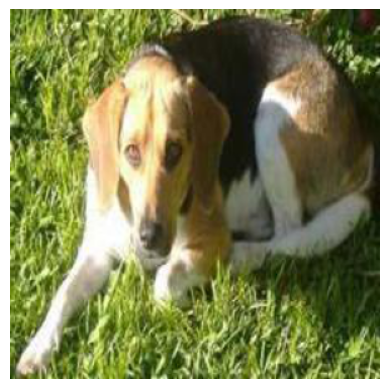

In [47]:
from PIL import Image
import matplotlib.pyplot as plt

# Trying to run model prediction with photo of beagle
image_path = "../Resources/cropped/train/n02088364-beagle/n02088364_3758.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (299, 299)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [48]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n02089973', 'English_foxhound', 0.5546941), ('n02088364', 'beagle', 0.30150202), ('n02089867', 'Walker_hound', 0.0839273)]


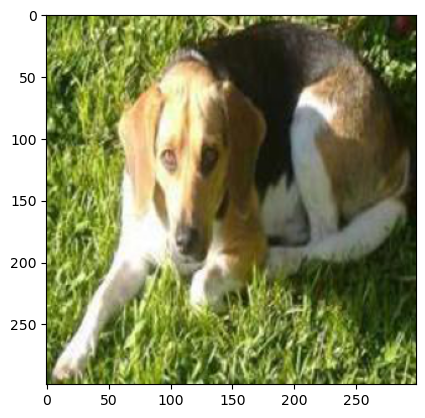

In [49]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

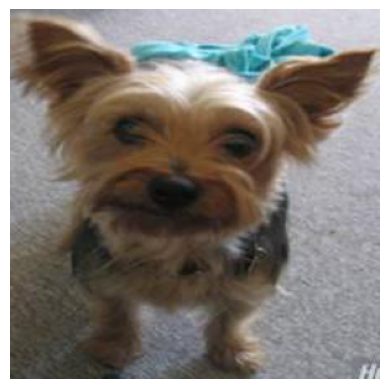

In [50]:
# Trying to run model prediction with photo of yorkshire terrior
image_path = "../Resources/cropped/train/n02094433-Yorkshire_terrier/n02094433_515.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (299, 299)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [51]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted: [[('n02094433', 'Yorkshire_terrier', 0.8057542), ('n02097658', 'silky_terrier', 0.04773027), ('n02096294', 'Australian_terrier', 0.021493632)]]


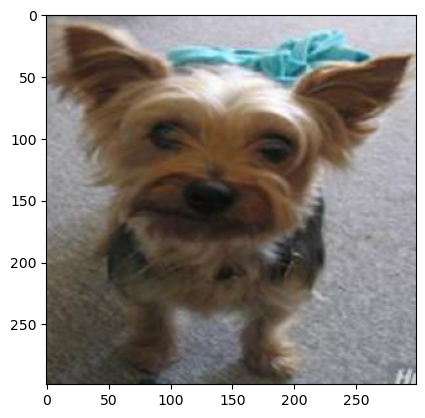

In [52]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [53]:
results = decode_predictions(predictions)[0]
dic = [{'breed': res[1], 'prediction': res[2]} for res in results]


In [54]:
import pandas as pd

__df = pd.DataFrame(dic)


In [55]:
__df.head()

,breed,prediction
0,Yorkshire_terrier,0.805754
1,silky_terrier,0.047730
2,Australian_terrier,0.021494
3,toy_terrier,0.010525
4,Norfolk_terrier,0.004215


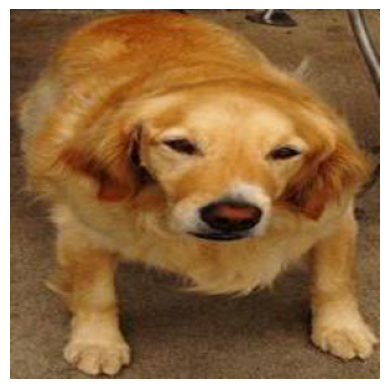

In [56]:
# Trying to run model prediction with photo of golden retriever
image_path = "../Resources/cropped/train/n02099601-golden_retriever/n02099601_704.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (299, 299)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [57]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted: [[('n02099601', 'golden_retriever', 0.9773301), ('n02099712', 'Labrador_retriever', 0.0040038936), ('n02101388', 'Brittany_spaniel', 0.0017580108)]]


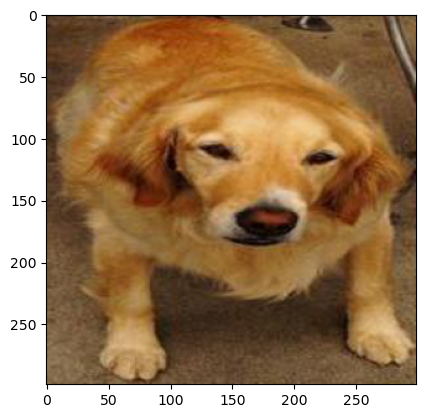

In [58]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [61]:
# prepare the dataframe of results and write to csv
file_path = "../Outputs/xception_model.csv"
__df.to_csv(file_path, index=False)
print(f"DataFrame wrote to csv successfully. ")

DataFrame wrote to csv successfully. 
